In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pathlib import Path
import folium 


In [2]:
csv_path = Path("/Users/sarahdutton/Desktop/data-visualizations-project-3/AustinTXAccidentsData3.csv")

# Import the comic_books_expanded.csv file as a DataFrame
traffic_df = pd.read_csv(csv_path, encoding="utf-8")

traffic_df.head()


,Unnamed: 0,ID,Source,Severity,Start_Date,Start_Time,End_Date,End_Time,Start_Lat,Start_Lng,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-261009,Source2,2,2016-11-30,16:03:54,2016-11-30,16:03:54,30.336502,-97.755646,...,False,False,False,False,False,False,Day,Day,Day,Day
1,1,A-261010,Source2,2,2016-11-30,16:32:18,2016-11-30,16:32:18,30.328165,-97.694305,...,False,False,False,False,False,False,Day,Day,Day,Day
2,2,A-261011,Source2,2,2016-11-30,16:31:45,2016-11-30,16:31:45,30.326077,-97.692307,...,False,True,False,False,True,False,Day,Day,Day,Day
3,3,A-261028,Source2,2,2016-11-30,17:11:22,2016-11-30,17:11:22,30.332523,-97.686707,...,False,False,False,False,False,False,Day,Day,Day,Day
4,4,A-261039,Source2,2,2016-11-30,17:16:42,2016-11-30,17:16:42,30.292852,-97.747017,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# set variables for Austin lat and long 
aus_lat = 30.266
aus_lng = -97.733

In [4]:
# instantiate a feature group for the accidents in the dataframe
aus_map = folium.Map(location=[aus_lat, aus_lng], zoom_start=12)

accidents = folium.map.FeatureGroup()

# loop through the 2000 accidents and add to feature group
for lat, lng, in zip(traffic_df.Start_Lat.dropna(), 
                     traffic_df.Start_Lng.dropna()):
    accidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color='Green',
            fill=True,
            fill_color='Red',
            fill_opacity=0.2
        )
    )

# add incidents to map
aus_map.add_child(accidents)

aus_map.save("aus_heatcirclemarker.html")

/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_8811/1262255121.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(traffic_df['Crossing'])
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/05/hqdn865j4plg9vq4vjst54t00000gn/T/ipykernel_8811/1262255121.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (

<Axes: xlabel='Traffic_Calming', ylabel='Density'>

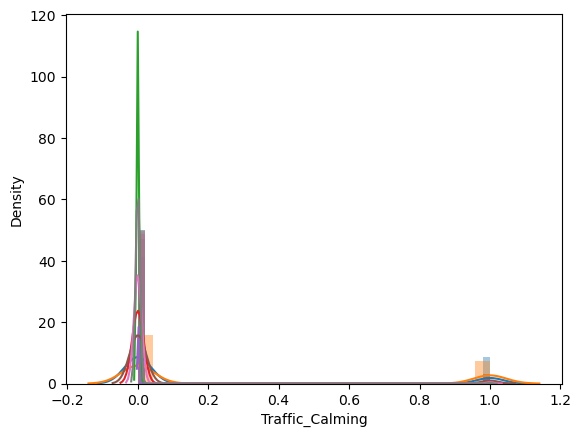

In [5]:
sns.distplot(traffic_df['Crossing'])
sns.distplot(traffic_df['Traffic_Signal'])
sns.distplot(traffic_df['Bump'])
sns.distplot(traffic_df['Junction'])
sns.distplot(traffic_df['Roundabout'])
sns.distplot(traffic_df['Station'])
sns.distplot(traffic_df['Stop'])
sns.distplot(traffic_df['Traffic_Calming'])
